In [1]:
import numpy as np
import healpy as hp
import pandas as pd
import seaborn as sns

import astropy.table
import astropy.coordinates as ac
from astropy import units as u

import completeness_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For aesthetics, this is optional
sns.set_context("talk")

**Querying and plotting available maps**
===============================

Completeness maps in 2D and 3D are provided in the maps directory in csv format. For details on how these were produced, please see Mateu et al. 2020. 
A couple of convenience functions are provided to manage them easily.

Querying and plotting 2D maps
-------

In [3]:
# Read 3D maps in the faint end (G>13), including full mag range completeness maps
C2D = pd.read_csv("maps/completeness2d.faint.rrab.csv",dtype=dict(hpix=np.int))
C2D.head()

,hpix,l,b,"ASAS[13,16]","PS1[13,16]","Gaia[13,16]","ASAS[16,18]","PS1[16,18]","Gaia[16,18]","ASAS[18,22]","PS1[18,22]","Gaia[18,22]",ASAS_full,PS1_full,Gaia_full
0,0,45.0,87.075820,1.000000,0.500000,1.000000,0.500,1.0,0.666667,0.0,0.500000,1.000000,1.000000,0.600000,0.888889
1,1,135.0,87.075820,1.000000,0.833333,1.000000,0.200,1.0,0.833333,0.0,1.000000,0.400000,1.000000,0.923077,0.764706
2,2,225.0,87.075820,0.500000,1.000000,0.666667,0.400,0.8,1.000000,0.0,0.666667,0.666667,0.750000,0.750000,0.916667
3,3,315.0,87.075820,0.666667,1.000000,1.000000,0.625,1.0,1.000000,0.0,0.666667,1.000000,0.857143,0.928571,1.000000
4,4,22.5,84.149733,0.666667,1.000000,1.000000,0.400,1.0,1.000000,0.0,0.666667,1.000000,0.833333,0.909091,1.000000


In [67]:
#Query one of the pre-computed completeness maps at a given line of sight 
coo = ac.SkyCoord(l=180.0*u.deg,b=30.0*u.deg,frame='galactic')
losC = completeness_utils.query_2d_map(C2D,coo)
losC

,hpix,l,b,"ASAS[13,16]","PS1[13,16]","Gaia[13,16]","ASAS[16,18]","PS1[16,18]","Gaia[16,18]","ASAS[18,22]","PS1[18,22]","Gaia[18,22]",ASAS_full,PS1_full,Gaia_full
768,768,182.8125,30.0,NaN,NaN,NaN,0.0,1.0,1.0,0.0,0.5,0.666667,NaN,0.666667,0.8


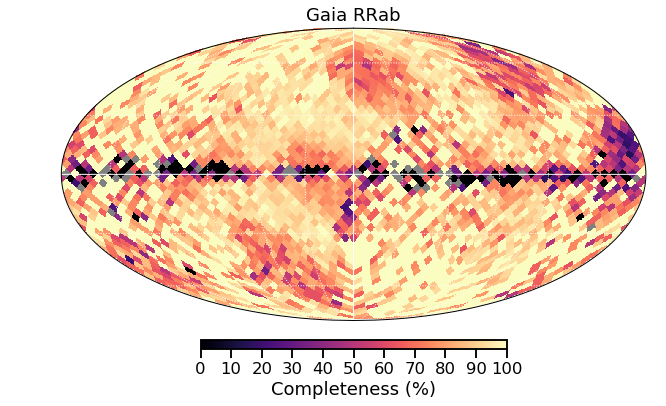

In [80]:
# Read 2D maps in the faint end (G>13), including full mag range completeness maps
# Plot a the full completeness map for selected survey
survey = "Gaia"
C = C2D[f"{survey}_full"]   # Completeness map for Gaia in its full magnitude range (G<20.7)
hp.mollview(C*100, cbar=False, title=f'{survey} RRab', cmap="magma",
            unit = 'Completeness ',max=100.,min=0.)
hp.graticule(color='white',verbose=False);

# Set colorbar by hand to force custom tickmarks - you can skip this block and use cbar=True in mollview instead
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
dx,dy,xo,yo=0.25,0.05,0.5,0.025
cbax=plt.axes((dx,dy,xo,yo))
cbar = fig.colorbar(image,cax=cbax,orientation="horizontal",)#,vmin=0,vmax=100.)
cbar.set_label("Completeness (%)")
cbar.set_ticks(plt.MultipleLocator(10))

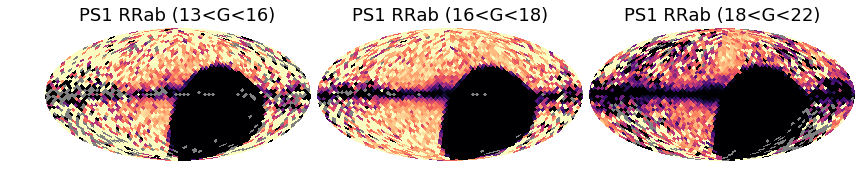

In [22]:
# Plot some completeness maps precomputed for different magnitude ranges
fig=plt.figure(1,figsize=(11.5,5)) 
fig.subplots_adjust(wspace=0.02,hspace=0.02,left=0.01,right=0.99,bottom=0.01,top=0.95)

rrt='ab'
survey='PS1'
C2D = pd.read_csv(f"maps/completeness2d.faint.rr{rrt}.csv",dtype=dict(hpix=np.int))

ax=fig.add_subplot(131)
C = C2D[f"{survey}[13,16]"]  
hp.mollview(C*100, cbar=False, title=f'{survey} RR{rrt} (13<G<16)', cmap="magma", hold=True,
            unit = 'Completeness ',max=100.,min=0.)

ax=fig.add_subplot(132)
C = C2D[f"{survey}[16,18]"]  
hp.mollview(C*100, cbar=False, title=f'{survey} RR{rrt} (16<G<18)', cmap="magma", hold=True,
            unit = 'Completeness ',max=100.,min=0.)


ax=fig.add_subplot(133)
C = C2D[f"{survey}[18,22]"]   
hp.mollview(C*100, cbar=False, title=f'{survey} RR{rrt} (18<G<22)', cmap="magma", hold=True,
            unit = 'Completeness ',max=100.,min=0.)



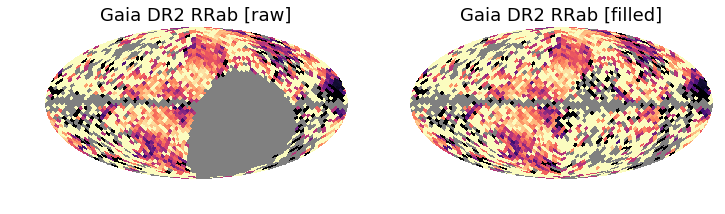

In [32]:
survey='Gaia'
C2D = pd.read_csv("maps/completeness2d.faint.rrab.csv",dtype=dict(hpix=np.int))
C = C2D[f"Gaia[18,22]"]

plt.figure(1,figsize=(12,6))
plt.subplot(121)
hp.mollview(C*100, cbar=False, title=f'{survey} DR2 RR%s [raw]' % ("ab"), cmap="magma", hold=True,
                unit = 'Completeness ',max=100.,min=0.)

plt.subplot(122)
C = completeness_utils.fill_with_ecliptic_opposite(np.array(C2D["Gaia[18,22]"]))
hp.mollview(C*100, cbar=False, title=f'{survey} DR2 RR%s [filled]' % ("ab"), cmap="magma", hold=True,
                unit = 'Completeness ',max=100.,min=0.)



Querying and plotting 3D maps
------------------------------

In [16]:
# Read 3D maps in the faint end (G>13), including full mag range completeness maps
gaia3D = pd.read_csv("maps/completeness3d.gaiadr2.vcsos.rrab.csv",dtype=dict(hpix=np.int))
gaia3D.head()

,hpix,l,b,D_o,D_f,C,eC
0,0,45.0,78.284148,1.274301,3.908865,1.000000,0.258199
1,0,45.0,78.284148,3.908865,5.525159,0.966667,0.251735
2,0,45.0,78.284148,5.525159,6.792161,0.933333,0.245251
3,0,45.0,78.284148,6.792161,7.916355,0.966667,0.251735
4,0,45.0,78.284148,7.916355,9.172384,0.933333,0.245251


In [17]:
#Query one of the pre-computed completeness maps at a given line of sight and distance
coo = ac.SkyCoord(l=65.4*u.deg,b=35.2*u.deg,frame='galactic')
Ci = completeness_utils.query_3d_map(gaia3D,coo,D=13.5*u.kpc)
print(Ci.C)
print(Ci.eC)

Selecting D=13.5
1733    0.933333
Name: C, dtype: float64
1733    0.245251
Name: eC, dtype: float64


In [18]:
#Query one of the pre-#Query one of the pre-computed completeness maps at a given line of sight, no distance constraint
coo = ac.SkyCoord(l=65.4*u.deg,b=35.2*u.deg,frame='galactic')
losC = completeness_utils.query_3d_map(gaia3D,coo)
losC.head()

No D selected


,hpix,l,b,D_o,D_f,C,eC
1714,43,67.5,30.0,1.189142,2.752091,0.866667,0.232220
1715,43,67.5,30.0,2.752091,3.949873,0.833333,0.225668
1716,43,67.5,30.0,3.949873,4.872203,0.866667,0.232220
1717,43,67.5,30.0,4.872203,5.640797,0.933333,0.245251
1718,43,67.5,30.0,5.640797,6.448686,1.000000,0.258199


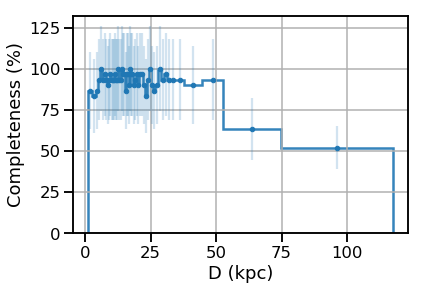

In [19]:
#Plot the retrieved completeness as a function of distance, for the given l.o.s.
rmid = (losC.D_f+losC.D_o)/2.
rs = np.append(np.min(losC["D_o"]),losC["D_f"])
ax=plt.subplot(111)
ax.plot(rmid,losC.C*100,'.',color="C0")
#The histogram plor gives a better representation of the data. Completeness was estimated in (non-uniform) distance bins to ensure a given Poisson noise.
ax.hist(rmid,weights=losC.C*100,bins=rs,histtype='step',lw=2.5,color='C0',alpha=0.9)
ax.errorbar(rmid,losC.C*100,yerr=losC.eC*100,marker=None,alpha=0.2,color='C0',ls='none')
ax.set_xlabel("D (kpc)")
ax.set_ylabel("Completeness (%)")
ax.grid()

in the above examples completeness errors are $\sim25\%$. If you'd like to change the angular resolution of the map, or it's distance resolution to achieve better errors, see the examples below on "Computing completeness maps".

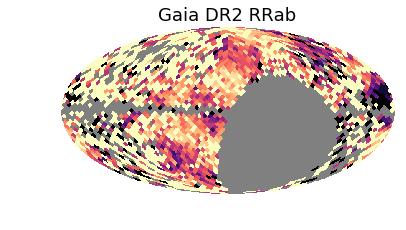

In [6]:
#C,r,d = completeness_utils.fill_with_ecliptic_opposite(C2D["Gaia[16,18]"],return_lb=True)
survey='Gaia'
C2D = pd.read_csv("maps/completeness2d.faint.rrab.csv",dtype=dict(hpix=np.int))
C = C2D[f"Gaia[18,22]"]
#C,r,d = completeness_utils.fill_with_ecliptic_opposite(np.array(C2D["Gaia[18,22]"]),return_lb=True)
#else: C = Cab[f"{survey}[18,22]"]   # Completeness map for Gaia in its full magnitude range (G<20.7)
hp.mollview(C*100, cbar=False, title=f'{survey} DR2 RR%s' % ("ab"), cmap="magma", hold=True,
                unit = 'Completeness ',max=100.,min=0.)



here


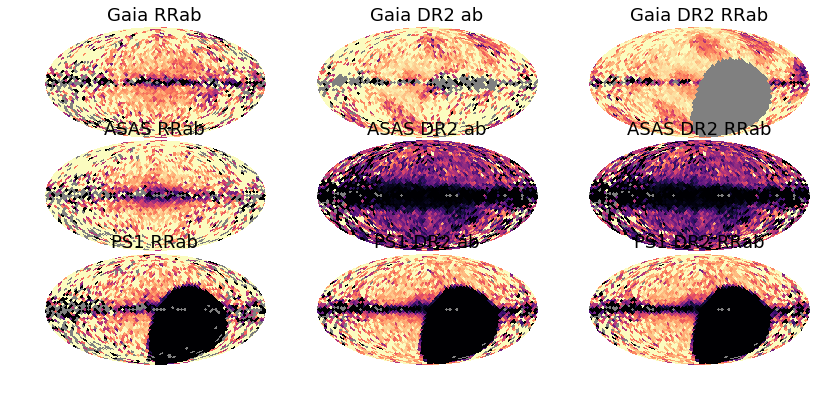

In [6]:
# Plot some completeness maps as a function of magnitude range
fig=plt.figure(1,figsize=(11.5,5)) 
fig.subplots_adjust(wspace=0.02,hspace=0.02,left=0.01,right=0.99,bottom=0.01,top=0.95)

survey='Gaia'
nn=0
for survey in ["Gaia","ASAS","PS1"]:
    ax=fig.add_subplot(3,3,3*nn+1)
    C = Cab[f"{survey}[13,16]"]   # Completeness map for Gaia in its full magnitude range (G<20.7)
    hp.mollview(C*100, cbar=False, title=f'{survey} RR%s' % ("ab"), cmap="magma", hold=True,
                unit = 'Completeness ',max=100.,min=0.)

    ax=fig.add_subplot(3,3,3*nn+2)
    C = Cab[f"{survey}[16,18]"]   # Completeness map for Gaia in its full magnitude range (G<20.7)
    hp.mollview(C*100, cbar=False, title=f'{survey} DR2 %s' % ("ab"), cmap="magma", hold=True,
                unit = 'Completeness ',max=100.,min=0.)


    ax=fig.add_subplot(3,3,3*nn+3)
    if 'Gaia' in survey:
        print('here')
        C,r,d = completeness_utils.fill_with_ecliptic_opposite(Cab[f"{survey}_full"],return_lb=True)
    #else: C = Cab[f"{survey}[18,22]"]   # Completeness map for Gaia in its full magnitude range (G<20.7)
    hp.mollview(C*100, cbar=False, title=f'{survey} DR2 RR%s' % ("ab"), cmap="magma", hold=True,
                unit = 'Completeness ',max=100.,min=0.)
    nn=nn+1

